In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
features_csv = "/content/drive/MyDrive/Data/EEWS/EEW_features_2024-04-12.csv"
feature_list = [' pkev12 ', ' pkev23 ', ' durP ', ' tauPd ', ' tauPt ',
       ' PDd ', ' PVd ', ' PAd ', ' PDt ', ' PVt ', ' PAt ', ' ddt_PDd ',
               ' ddt_PVd ', ' ddt_PAd ']
label_list = [' PGA ', ' PGV ', ' tPGA ', ' tPGV ']
features_df = pd.read_csv(features_csv)

#train test split
train_features_df, test_features_df = train_test_split(
   features_df, test_size=0.2, random_state=42
)

epsilon = 1e-7
feature_data = np.log10(np.where(np.isnan(features_df[feature_list].values) | (features_df[feature_list].values < 0), 0, features_df[feature_list].values) + epsilon)
label_data = np.log10(np.nan_to_num(features_df[label_list].values, nan=0.0) + epsilon)

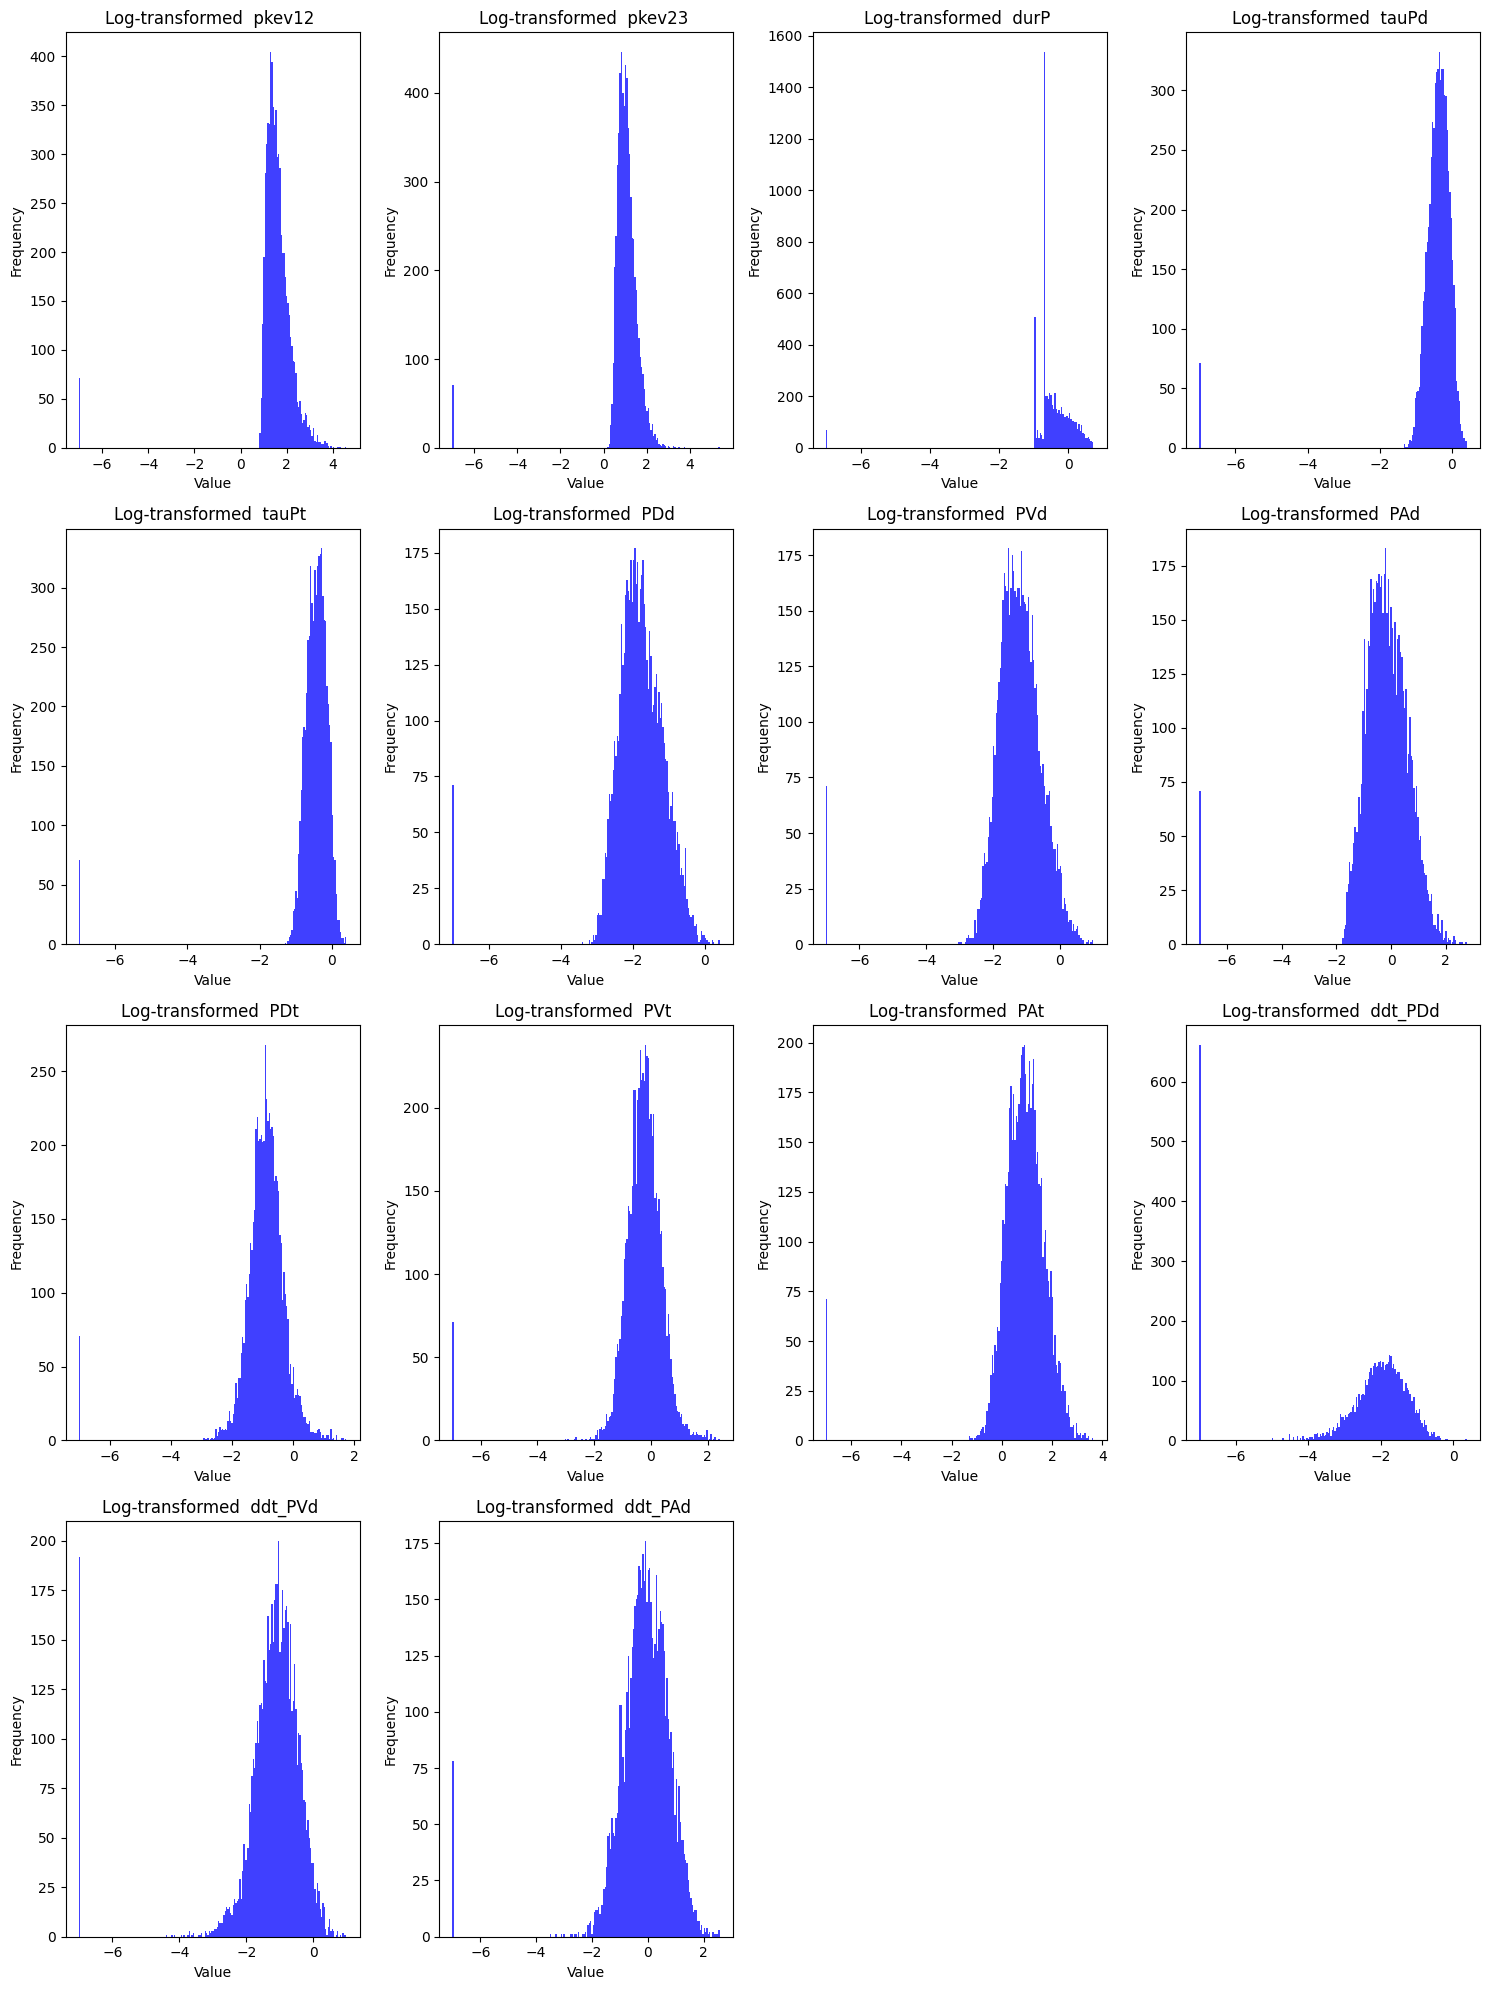

In [ ]:
# Def no. of columns for subplots
cols = 4
rows = len(feature_list) // cols + (len(feature_list) % cols > 0)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, feature in enumerate(feature_list):
    axes[i].hist(feature_data[:,i], bins=200, alpha=0.75, color='blue')
    axes[i].set_title(f'Log-transformed {feature}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots if the number of features is not a multiple of the number of columns
for ax in axes[len(feature_list):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

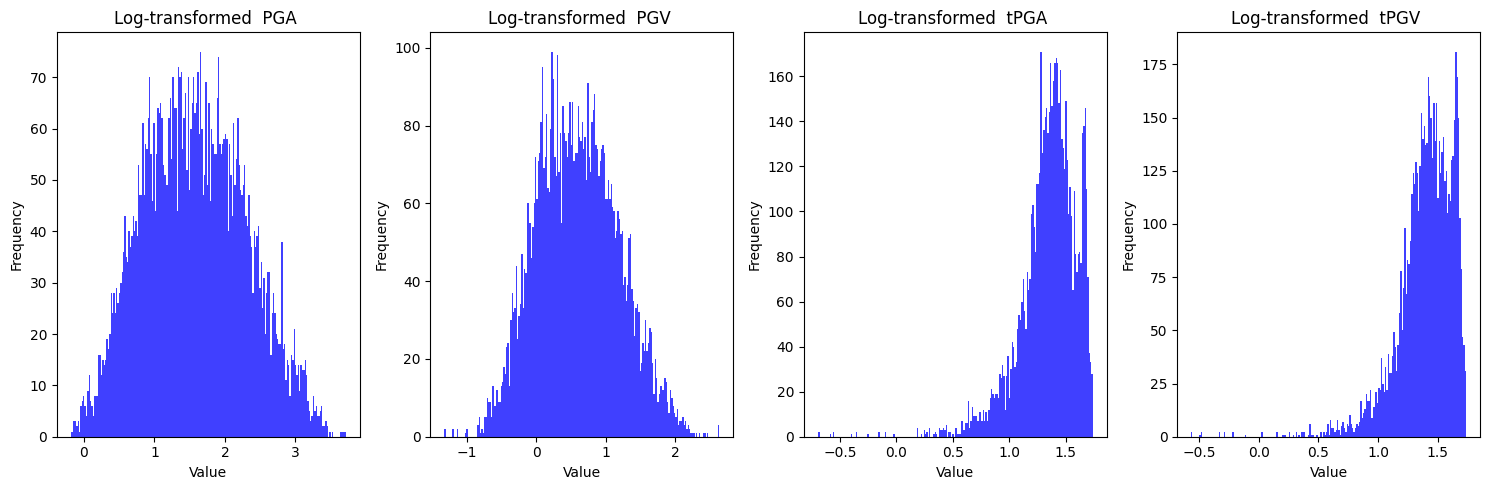

In [ ]:
# Def no. of columns for subplots
cols = 4
rows = len(label_list) // cols + (len(label_list) % cols > 0)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, label in enumerate(label_list):
    axes[i].hist(label_data[:,i], bins=200, alpha=0.75, color='blue')
    axes[i].set_title(f'Log-transformed {label}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots if the number of features is not a multiple of the number of columns
for ax in axes[len(label_list):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()